In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import os 
import time
from ipywidgets import interact
import ipywidgets as widgets


In [7]:
base_dir = os.path.join(os.getcwd(), 'dataset\\ElderReact_Data\\ElderReact_train\\')


for filename in os.listdir(base_dir):

    FILENAME = base_dir + filename
#    os.system(os.getcwd() + '\\OpenFace\\FeatureExtraction.exe -f ' +  FILENAME + ' -out_dir myProcessed\\' + filename[:-4])

Scelgo un file ogni 5 video; così se ho, per esempio, 15 video di reazioni ad uno stimolo, avrò 3 file rappresentativi
mentre se ho 6 video relativi ad un altro stimolo ne avrò 1 ecc ecc.

In [8]:
filenames = []
for i, filename in enumerate(os.listdir("myProcessed")):
    if i%5==0:
        filenames.append(filename)
print("Numero di video scelti: ", len(filenames))

Numero di video scelti:  123


Extra: Here are some tips for loading and plotting the data.

In [15]:
get_ipython().run_line_magic('matplotlib', 'inline')
get_ipython().run_line_magic('config', "InlineBackend.figure_format = 'retina'")
import pandas as pd, seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt 

# Load data
for filename in filenames:
    df = pd.read_csv('myProcessed/'+ filename + '/' + filename + '.csv')
    # Remove empty spaces in column names.
    df.columns = [col.replace(" ", "") for col in df.columns]
    # Print few values of data.
    # print(f"Max number of frames {df.frame.max()}", f"\nTotal shape of dataframe {df.shape}")
df.head()

,frame,face_id,timestamp,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,1,0,0.000,0.98,1,0.295510,0.488109,-0.821233,0.189137,0.459548,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,0,0.033,0.98,1,0.307701,0.507854,-0.804614,0.186251,0.477925,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,0,0.067,0.98,1,0.339434,0.502256,-0.795313,0.197226,0.462840,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,0,0.100,0.98,1,0.369936,0.477507,-0.796953,0.211501,0.430237,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,0,0.133,0.98,1,0.387862,0.438199,-0.810891,0.223008,0.394145,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [14]:
df

,frame,face_id,timestamp,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,1,0,0.000,0.98,1,0.295510,0.488109,-0.821233,0.189137,0.459548,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,0,0.033,0.98,1,0.307701,0.507854,-0.804614,0.186251,0.477925,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,0,0.067,0.98,1,0.339434,0.502256,-0.795313,0.197226,0.462840,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,0,0.100,0.98,1,0.369936,0.477507,-0.796953,0.211501,0.430237,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,0,0.133,0.98,1,0.387862,0.438199,-0.810891,0.223008,0.394145,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,187,0,6.206,0.93,1,0.287289,0.455881,-0.842400,0.191434,0.429882,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
187,188,0,6.240,0.98,1,0.299133,0.461684,-0.835085,0.214301,0.428481,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
188,189,0,6.273,0.93,1,0.296098,0.461843,-0.836078,0.223345,0.429113,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
189,190,0,6.306,0.93,1,0.302496,0.466858,-0.830987,0.219041,0.435229,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


See how many unique faces there are

In [16]:
print("Number of unique faces: ", len(df.face_id.unique()), "\nList of face_id's: ", df.face_id.unique())

Number of unique faces:  1 
List of face_id's:  [0]


In [17]:
df.groupby('face_id').mean()['confidence']

face_id
0    0.951466
Name: confidence, dtype: float64

[(0.0, 1920.0), (1080.0, 0.0), Text(0.5, 1.0, 'Before thresholding')]

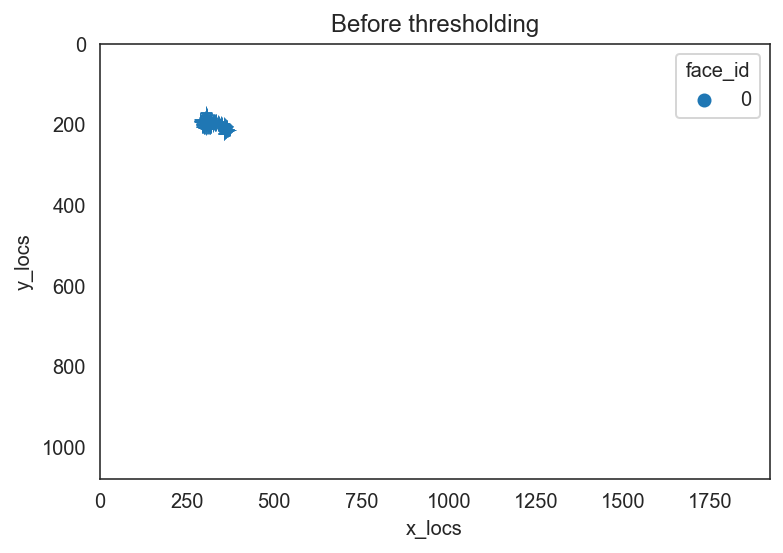

In [18]:
import re
x_regex_pat = re.compile(r'^x_[0-9]+$')
y_regex_pat = re.compile(r'^y_[0-9]+$')
x_locs = df.columns[df.columns.str.contains(x_regex_pat)]
y_locs = df.columns[df.columns.str.contains(y_regex_pat)]

no_unique_faces = len(df.face_id.unique())
palette = sns.color_palette()  

avg_face_df = pd.DataFrame({'x_locs':df[x_locs].mean(axis=1), 'y_locs':df[y_locs].mean(axis=1), 'face_id': df.face_id})
ax = sns.scatterplot(x='x_locs', y='y_locs', hue = 'face_id', data=avg_face_df, marker="+")#, palette=palette)
ax.set(xlim=[0, 1920], ylim=[1080,0], title="Before thresholding")

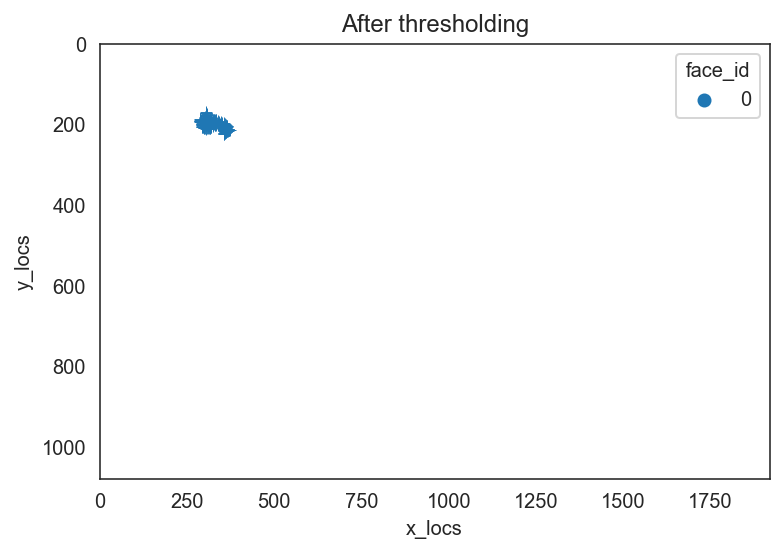

In [19]:
avg_face_df_conf = avg_face_df[df.confidence>=.80]
no_unique_faces = len(avg_face_df_conf.face_id.unique())
ax = sns.scatterplot(x='x_locs', y='y_locs', hue = 'face_id', data=avg_face_df_conf, marker="+", palette=palette[:no_unique_faces])
ax.set(xlim=[0, 1920], ylim=[1080,0], title="After thresholding");